**Project: House Sales in King County, USA**

Import the required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from getpass import getpass

path=getpass("Enter the path of dataset:")

Enter the path of dataset:··········


Load the csv:

In [ ]:
df=pd.read_csv(path)

**1)Data acquisition**

Analyze the dataset through its statistical and concise summary

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
df.describe(include="all")

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


Displaying the data types of each column using the function dtypes.

In [ ]:
df.dtypes

,0
id,int64
date,object
price,float64
bedrooms,int64
bathrooms,float64
sqft_living,int64
sqft_lot,int64
floors,float64
waterfront,int64
view,int64


**2)Data wrangling**

Analyzing Null values in columns

In [ ]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
headers=['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']

In [ ]:
for column in headers:
  df[column].replace(np.nan,"?",inplace=True)

df.head(10)

/tmp/ipython-input-2162000606.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].replace(np.nan,"?",inplace=True)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [ ]:
for column in headers:
  print(f"No.of Null values in column {column}:{df[column].isnull().sum()}\n")

No.of Null values in column id:0

No.of Null values in column date:0

No.of Null values in column price:0

No.of Null values in column bedrooms:0

No.of Null values in column bathrooms:0

No.of Null values in column sqft_living:0

No.of Null values in column sqft_lot:0

No.of Null values in column floors:0

No.of Null values in column waterfront:0

No.of Null values in column view:0

No.of Null values in column condition:0

No.of Null values in column grade:0

No.of Null values in column sqft_above:0

No.of Null values in column sqft_basement:0

No.of Null values in column yr_built:0

No.of Null values in column yr_renovated:0

No.of Null values in column zipcode:0

No.of Null values in column lat:0

No.of Null values in column long:0

No.of Null values in column sqft_living15:0

No.of Null values in column sqft_lot15:0



Here , we can see that there are no Null values ,Hence we dont need to replace it with mean or freq.

In [ ]:
df = df.drop('date', axis=1)

Dropped column "Date" as it would no longer help in further analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [ ]:
df.describe(include="all")

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Lets analyze Bedrooms column

In [ ]:
bedroom_count=df["bedrooms"].value_counts()
bedroom_count

,count
bedrooms,
3,9824
4,6882
2,2760
5,1601
6,272
1,199
7,38
0,13
8,13


Here,we see that Most of the Houses in dataset have "3" bedrooms.



Lets visualize it through bar graph

<BarContainer object of 13 artists>

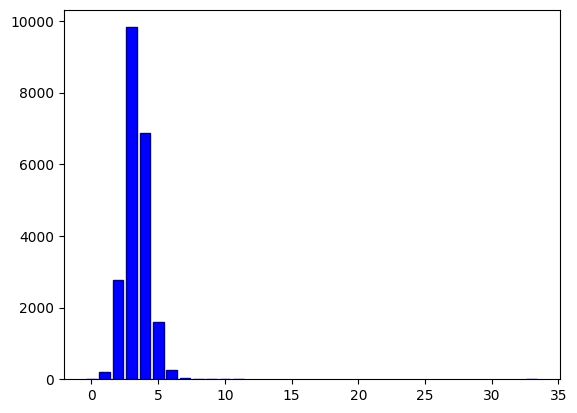

In [ ]:
plt.bar(bedroom_count.index,bedroom_count.values,color="blue",edgecolor="darkblue")


In [ ]:
floors_count=df["floors"].value_counts()
floors_count

,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


Here ,we can see that most of houses are at 1st floor.

<BarContainer object of 6 artists>

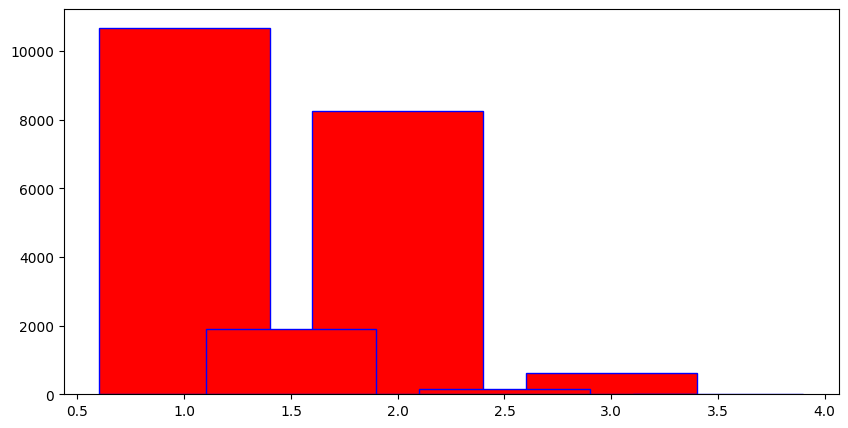

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(floors_count.index,floors_count.values,color="red",edgecolor="blue")

**3)EDA**

Now lets understand how different attributes are related to each other

In [ ]:
corr=df.corr()
corr

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


Here,we just see the numerical values and its hard to find out and go through each numeric value ,hence we will visualize it for better insights via Heatmap

<Axes: >

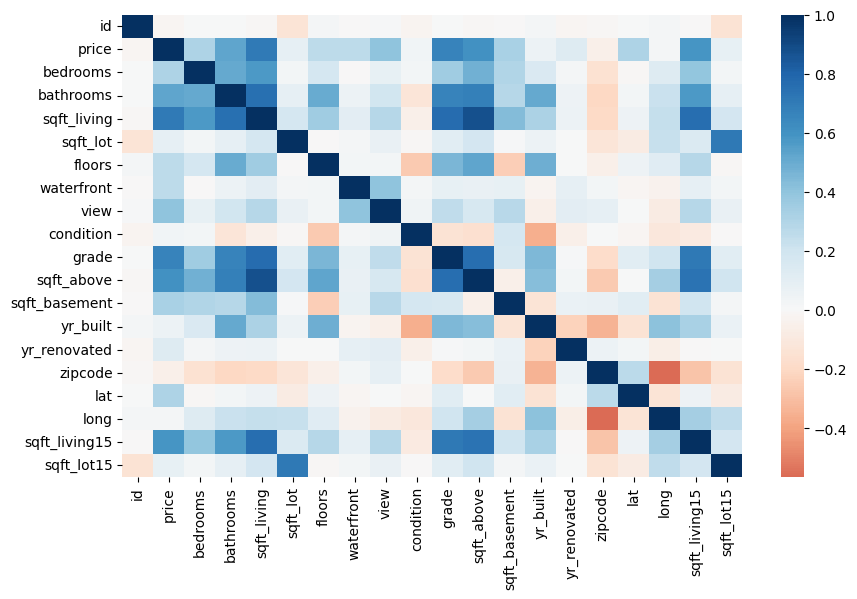

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=False,cmap="RdBu",center=0)

Here,we see that "sqft_living,grade and sqft_living15" are highly correlated with "Price"

In [ ]:
data=df.select_dtypes(include=[np.number])
data.corr()['price'].sort_values()

,price
zipcode,-0.053203
id,-0.016762
long,0.021626
condition,0.036362
yr_built,0.054012
sqft_lot15,0.082447
sqft_lot,0.089661
yr_renovated,0.126434
floors,0.256794
waterfront,0.266369


Sqft_living is highly correlated with it .Lets make a regplot for it

<Axes: xlabel='sqft_living', ylabel='price'>

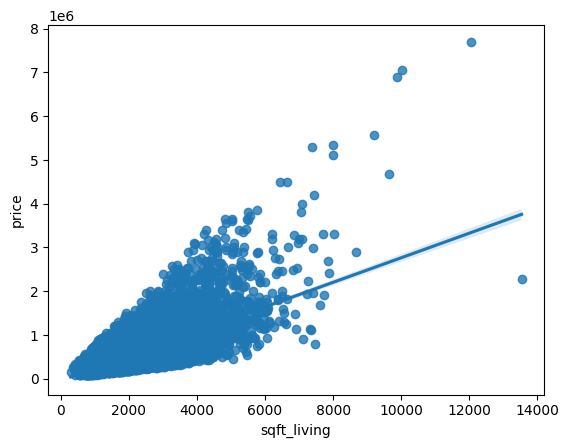

In [ ]:
sns.regplot(x=df["sqft_living"],y=df["price"])

4)Model Development

Lets fit a linear model for predicting prices using sqft_living

In [ ]:
from sklearn.linear_model import LinearRegression
lm1=LinearRegression()
x1=df[["sqft_living"]]
y1=df["price"]

lm1.fit(x1,y1)
print(f"Coefficient is :{lm1.coef_}")
print(f"intercept is: {lm1.intercept_}")
yhat1=lm1.predict(x1)
print(yhat1[0:5])

Coefficient is :[280.6235679]
intercept is: -43580.74309447396
[287555.06702451 677621.82640197 172499.40418656 506441.44998452
 427866.85097324]


Lets create a List to store R2 scores that we can visualize it later for checking Improvement in models

In [ ]:
R2_scores=[]


In [ ]:
R2_scores_test=[]

In [ ]:
linear_model=lm1.score(x1,y1)
linear_model


0.4928532179037931

In [ ]:
R2_scores.append(linear_model)
R2_scores

[0.4928532179037931]

Now lets visulaize actual and predicted values

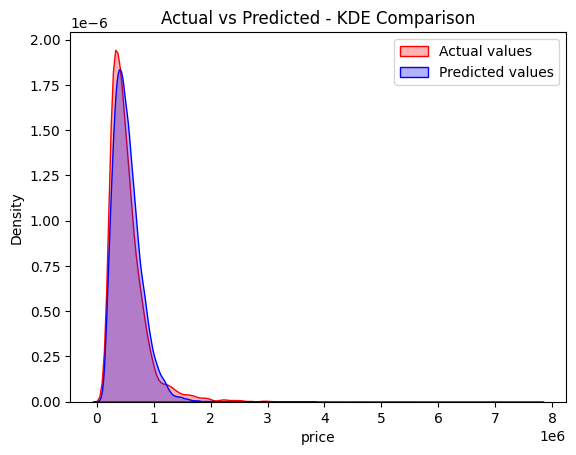

In [ ]:
sns.kdeplot(y1, color="r", label="Actual values", fill=True, alpha=0.3)
sns.kdeplot(yhat1, color="b", label="Predicted values", fill=True, alpha=0.3)

plt.legend()
plt.title("Actual vs Predicted - KDE Comparison")
plt.show()

As R2 score for model is less than 0.5 ,we will take more features for model development though its visualization fits well

Fitting a linear regression model to predict the 'price' using the list of features:

In [ ]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]

In [ ]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]
lm2=LinearRegression()
x2=df[features]
y2=df["price"]
lm2.fit(x2,y2)


LinearRegression()

In [ ]:
yhat2=lm2.predict(x2)
yhat2[0:5]

array([283413.07663028, 662377.84349024, 305956.87442547, 408313.00471717,
       532334.67094088])

In [ ]:
multi_linear=lm2.score(x2,y2)
multi_linear

0.6577151058279325

In [ ]:
R2_scores.append(multi_linear)

In [ ]:
from sklearn.metrics import mean_squared_error as mse
mse=mse(y2,yhat2)
mse

46131837578.599625

Here, we can see R2 score is good though , we need higher than this and also reduce MSE,so lets transform it to higher degree polynomial and perform Linear Regression on it.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.pipeline import Pipeline

pr=PolynomialFeatures(degree=2)
x2_poly=pr.fit_transform(x2)
lm2_poly=LinearRegression()
lm2_poly.fit(x2_poly,y2)
poly_linear=lm2_poly.score(x2_poly,y2)
poly_linear

0.7513467656307005

In [ ]:
R2_scores.append(poly_linear)

Here,you can see R2 score have been increased as compared to previous model. This is because of increase in polynomial degree .Lets check out which polynomial degree fits well .

In [ ]:
degree=[1,2,3,4]
score=[]
for i in degree:
  pr1=PolynomialFeatures(degree=i)
  x2_poly1=pr1.fit_transform(x2)
  lm2_poly1=LinearRegression()
  lm2_poly1.fit(x2_poly1,y2)

  print(f"Score for degree {i} is {lm2_poly1.score(x2_poly1,y2)}")
  score.append(lm2_poly1.score(x2_poly1,y2))
print(score)


Score for degree 1 is 0.6577151058279326
Score for degree 2 is 0.7513467656307005
Score for degree 3 is 0.7661405696483564
Score for degree 4 is 0.781820156054464
[0.6577151058279326, 0.7513467656307005, 0.7661405696483564, 0.781820156054464]


In [ ]:
R2_scores.append(score[3])
R2_scores

[0.4928532179037931, 0.7513467656307005, 0.781820156054464]

As we can see R2 score is increasing as degree is increased

Lets build a Pipeline for degree=5 and calculate R2 score .

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.pipeline import Pipeline
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]

x2=df[features]
y2=df["price"]
Input=[('scale',StandardScaler()),('polynomial',PolynomialFeatures(degree=5)),('model',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(x2,y2)
print(f"R2 score:{pipe.score(x2,y2)}")
yhat_pipe=pipe.predict(x2)
yhat_pipe[0:5]
pipe_model=pipe.score(x2,y2)


In [ ]:
R2_scores.append(pipe_model)

Here,we have **improved** our R2 score for our Model .

Now,we have large coefficient .In order to penalize it we have to use hyperparameter

For this we will use Ridge regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures,StandardScaler

features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]

x2=df[features]
y2=df["price"]
ridge=Ridge(alpha=0.001)
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.3,random_state=1)
pr1=PolynomialFeatures(degree=2)
x2_train_pr=pr1.fit_transform(x2_train)
x2_test_pr=pr1.transform(x2_test)



In [ ]:
ridge.fit(x2_train,y2_train)

Ridge(alpha=0.001)

In [ ]:
ridge_model=ridge.score(x2_test,y2_test)
ridge_model_train=ridge.score(x2_train,y2_train)

In [ ]:
R2_scores.append(ridge_model_train)

In [ ]:
R2_scores_test.append(ridge_model)

We will use **GridSearchCV** in order to find which Alpha value fits best.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
param_grid = {'alpha': [0.0001,0.001, 0.01, 0.1, 1, 10,100]}
ridge = Ridge()

grid = GridSearchCV(ridge, param_grid, cv=3)
grid.fit(x2_train, y2_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]})

In [ ]:
print(grid.best_params_)
print(grid.best_score_)
print("Train R²:", grid.score(x2_train, y2_train))
print("Test R²:", grid.score(x2_test, y2_test))
grid_model=grid.score(x2_test,y2_test)
grid_model_train=grid.score(x2_train,y2_train)

{'alpha': 0.0001}
0.6592292583791027
Train R²: 0.6607838139680264
Test R²: 0.6505488598928029


In [ ]:
R2_scores.append(grid_model_train)

In [ ]:
R2_scores_test.append(grid_model)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# train-test split (you already do this)
X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size=0.3, random_state=1)

# RandomForest model
rf = RandomForestRegressor(n_estimators=200, random_state=1)

# Train
rf.fit(X_train, y_train)

# Evaluate
print("Train R²:", rf.score(X_train, y_train))
print("Test R²:", rf.score(X_test, y_test))
rf_model=rf.score(X_test,y_test)
rf_model_train=rf.score(X_train,y_train)

Train R²: 0.9737876812894443
Test R²: 0.8062226430563953


In [ ]:
R2_scores.append(rf_model_train)

In [ ]:
R2_scores_test.append(rf_model)

In [ ]:
R2_scores

[0.4928532179037931,
 0.6577151058279325,
 0.7513467656307005,
 0.781820156054464,
 0.8918976688240682,
 0.6607838139652773,
 0.6607838139680264,
 0.9737876812894443]

In [ ]:
R2_scores_test

[0.6505488527735284, 0.6505488598928031, 0.8062226430563953]

Now ,we will visualize how we have improved our Model

Text(0.5, 1.0, 'R2_scores for different Trained models')

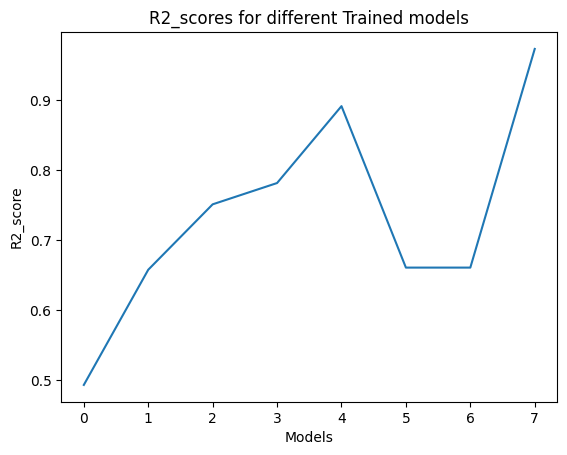

In [ ]:
plt.plot(R2_scores)
plt.xlabel("Models")
plt.ylabel("R2_score")
plt.title("R2_scores for different Trained models")

Text(0.5, 1.0, 'R2_scores for different Tested models')

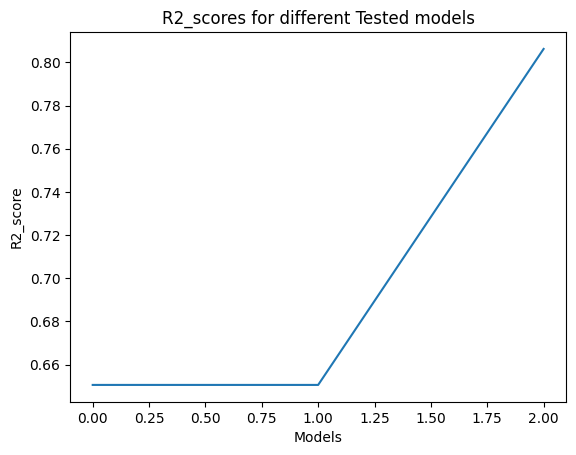

In [ ]:
plt.plot(R2_scores_test)
plt.xlabel("Models")
plt.ylabel("R2_score")
plt.title("R2_scores for different Tested models")

# **Now,this model can be used for House prediction.**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import numpy as np

# Features
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement",
            "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]

X = df[features]
y = df["price"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create pipeline
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

# GridSearchCV
param_grid = {'ridge__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(pipeline, param_grid, cv=3)
grid.fit(X_train, y_train)

# Best model
best_pipeline = grid.best_estimator_

# Evaluation
y_pred = best_pipeline.predict(X_test)
print("Best alpha:", grid.best_params_)
print("Train R²:", r2_score(y_train, best_pipeline.predict(X_train)))
print("Test R²:", r2_score(y_test, y_pred))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


Best alpha: {'ridge__alpha': 0.0001}
Train R²: 0.7451353250074593
Test R²: 0.7561683699579866
Test RMSE: 195076.60189974474


In [ ]:
# Step 2: Import required libraries
import joblib
import os

# Step 3: Define save path in Google Drive
save_path = "{//Enter Drive path where u have to save your Model//}"
os.makedirs(save_path, exist_ok=True)  # create folder if it doesn't exist

# Step 4: Save trained model & polynomial transformer
model_path = os.path.join(save_path, "house_price_pipeline.pkl")




# Save single pipeline
joblib.dump(best_pipeline, model_path)


print(f"✅ Model saved at: {model_path}")


# Step 5: Verify files
print("Files in save folder:", os.listdir(save_path))